# Maciej Gryszkiewicz
## Praca Domowa nr 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import category_encoders as ce
import random
import warnings
warnings.filterwarnings("ignore")
random.seed(42)

In [2]:
transactions = pd.read_csv("allegro-api-transactions.csv")

In [3]:
transactions.head(3)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

In [5]:
transactions.describe()

,lp,item_id,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating
count,420020.000000,4.200200e+05,420020.000000,420020.000000,420020.000000,420020.000000,420020.000000,420020.000000,420020.000000
mean,210009.500000,5.809067e+09,0.877972,0.812495,76.811350,0.583456,6748.274823,0.016694,20402.593496
std,121249.474369,3.387402e+08,0.327318,0.390317,390.326271,0.492987,23387.248064,0.128124,36682.898636
min,0.000000,4.179879e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,105004.750000,5.652990e+09,1.000000,1.000000,9.000000,0.000000,6.000000,0.000000,1581.000000
50%,210009.500000,5.968052e+09,1.000000,1.000000,24.990000,1.000000,95.000000,0.000000,6711.000000
75%,315014.250000,6.070760e+09,1.000000,1.000000,68.450000,1.000000,931.000000,0.000000,21007.000000
max,420019.000000,6.099927e+09,1.000000,1.000000,119000.000000,1.000000,99999.000000,1.000000,292074.000000


# Podpunkt 1

Najpierw dzielimy nasz zbiór danych na zmienne objaśniające i zmienną celu.

In [6]:
X = transactions.drop("price", axis = 1)
y = transactions[["price"]]

Aby wykluczyć niespójne pisownie nazw miast, zamieniamy wszystkie litery na wielkie litery.

In [7]:
X[["it_location"]] = X[["it_location"]].apply(lambda x: x.astype(str).str.upper())
X[["it_location"]].head()

,it_location
0,WARSZAWA
1,WARSZAWA
2,LESZNO
3,WOLA KRZYSZTOPORSKA
4,BIAŁYSTOK


## TargetEncoding

Tworzymy encoder, dopasowywujemy go do naszych danych, a następnie encodujemy ramkę X.

In [8]:
target_encoder = ce.TargetEncoder(cols = ["it_location"])
target_encoder.fit(X, y)
X_target_encoded = target_encoder.transform(X)

In [9]:
X_target_encoded.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,84.132898,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,84.132898,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,64.883187,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,73.772916,"Odzież, Obuwie, Dodatki"


TargetEncoding liczy średnią wartość zmiennej celu (w tym wypadku jest to cena) i zastępuje zmienna kategoryczną (tutaj it_location) średnią wyliczoną dla tej kategorii.\
Rozwiązanie sprawia to, że w dalszym ciągu mamy tylko jedną kolumnę określającą *it_location*, a więc ramka danych nie zostaje powiększona. Wadą tej metody jest to, że jej wynik zależny jest od rozkładu zmiennej celu. Można sobie wyobrazić również sytuację, w której dwie różne kategorię mają te samą średnią zmiennej celu (a więc dla modelu staną się one nierozróżnialne). Jest to przypadek mało prawdopodbny, ale możliwy.

## Metoda nr 1 - OneHotEncoding

In [10]:
one_hot_encoder = ce.OneHotEncoder(cols=["main_category"])
one_hot_encoder.fit(X, y)
X_one_hot_encoded = one_hot_encoder.transform(X)
X_one_hot_encoded.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,...,0,0,0,0,0,0,0,0,0,0


Jak widać OneHotEncoder dodał nam do ramki danych 28 kolumn. Rozwiązanie to zwiększa znacząco naszą ramkę danych, zwłaszcza w przypadku bardziej zróżnicowanych zmiennych kategorycznych. Dla przykładu, jeśli próbowalibyśmy zakodować kolumnę *it_location* za pomocą OneHotEncoding nasza ramka danych zostałaby poszerzona o ponad 700 nowych kolumn. Dużą zaletą tego rozwiązania jest to, że kodowanie OneHot w żaden sposób nie zmienia znaczenia kodowanych danych. W dalszym ciągu pokazują one przynależność do określonej kategorii jednak jest to teraz zrozumiałe również dla komputera.

## Metoda nr 2 - HashingEncoding

In [11]:
binary_encoder = ce.BinaryEncoder(cols=["main_category"])
binary_encoder.fit(X, y)
X_binary_encoded = binary_encoder.transform(X)
X_binary_encoded.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,WARSZAWA,0,0,0,0,0,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,WARSZAWA,0,0,0,0,1,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,LESZNO,0,0,0,0,1,1
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,WOLA KRZYSZTOPORSKA,0,0,0,1,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,BIAŁYSTOK,0,0,0,0,1,0


BinaryEncoding działa w bardzo podobny sposób co OneHotEncoding, jednak zamiast pojedyńczych jedynek korzysta on z kombinacji 0 i 1. Sprawia to, że ilość niezbędnych dodatkowych kolumn staję się dużo mniejsza. Niestety w dużym stopniu utrudnia to interpretację ramki danych przez człowieka (a przynajmniej na pierwszy rzut oka). 

## Metoda nr 3 - CountEncoding

In [12]:
count_encoder = ce.CountEncoder(cols=["main_category"])
count_encoder.fit(X, y)
X_count_encoded = count_encoder.transform(X)
X_count_encoded.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,WARSZAWA,14491
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,WARSZAWA,54257
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,LESZNO,91042
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,WOLA KRZYSZTOPORSKA,11572
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,BIAŁYSTOK,54257


CountEncoder liczy ilość wystąpień danej kategorii i podmienia zmienną kategoryczną na uzyskaną liczbę. W tym kodowaniu również może wystąpić przypadek, że dwie kategorie staną się nie do rozróżnienia (będą miały taką samą ilość wystąpień) i w ten sposób stracimy cenne informacje. Zaletą jest banalna implementacja i wymaganie tylko jednej kolumny na zakodowane informacje.

# Podpunkt 2

In [13]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
# weźmy 10.000 losowych rekordów dla lepszej wydajności
X_true = transactions[["price", "it_seller_rating", "it_quantity"]].sample(n=10000)

#### Wariant 1 - 10% danych z kolumny 'it_seller_rating' zamieniamy na wartości NaN

In [14]:
mse_list = []
for i in range(10):
    # wybieramy losowo 10% rekordów, z których usuniemy dane
    X_sample = X_true.sample(frac=0.1) 
    # zostępujemy 'it_seller_rating' w losowo wybranych rekordach wartością NaN
    X_sample[["it_seller_rating"]] = np.nan
    # 'doklejamy' zmienione rekordy do reszty danych
    X_partial = pd.concat([X_true, X_sample])
    # usuwamy duplikaty zachowując ostatni rekord (w ten sposób zachowamy tylko rekordy zmienione)
    X_partial = X_partial.loc[~X_partial.index.duplicated(keep='last')]
    X_partial = X_partial.sort_index()

    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    X_pred = imputer.fit_transform(X_partial)

    X_pred = pd.DataFrame(X_pred, columns=["price", "it_seller_rating", "it_quantity"])
    
    mse_list.append(mean_squared_error(X_true["it_seller_rating"], X_pred["it_seller_rating"], squared=False).round(2))

RMSE = pd.DataFrame(mse_list, columns=["it_seller_rating"])

RMSE w tym przypadku prezentują się następująco:

In [15]:
RMSE

,it_seller_rating
0,51380.57
1,51645.59
2,51667.85
3,51553.27
4,51768.49
5,51626.60
6,51725.60
7,51468.10
8,51771.29
9,51697.90


A odchylenie standardowe z tych danych to:

In [16]:
np.std(RMSE).round(2)

it_seller_rating    122.02
dtype: float64

Wykresy prezentujące RMSE dla zmiennej "it_seller_rating"

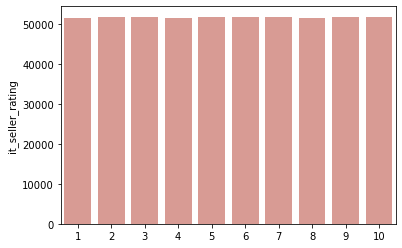

In [17]:
sns.barplot(data=RMSE, x=RMSE.index+1, y=RMSE["it_seller_rating"], color = "salmon", saturation=0.5);

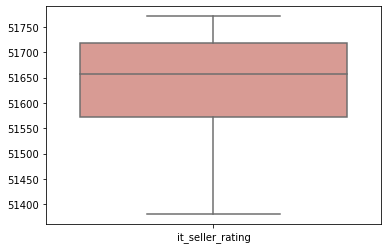

In [18]:
sns.boxplot(data=RMSE, color = "salmon", saturation=0.5);

#### Wariant 2 - 10% danych z kolumn 'it_seller_rating' i 'it_quantity' zamieniamy na wartości NaN

In [19]:
mse_list = []
for i in range(10):
    # wybieramy losowo 10% rekordów, z których usuniemy dane
    X_sample = X_true.sample(frac=0.1) 
    # zostępujemy 'it_seller_rating' w losowo wybranych rekordach wartością NaN
    X_sample[["it_seller_rating", "it_quantity"]] = np.nan
    # 'doklejamy' zmienione rekordy do reszty danych
    X_partial = pd.concat([X_true, X_sample])
    # usuwamy duplikaty zachowując ostatni rekord (w ten sposób zachowamy tylko rekordy zmienione)
    X_partial = X_partial.loc[~X_partial.index.duplicated(keep='last')]
    X_partial = X_partial.sort_index()

    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    X_pred = imputer.fit_transform(X_partial)

    X_pred = pd.DataFrame(X_pred, columns=["price", "it_seller_rating", "it_quantity"])

    # mse_list.append(mean_squared_error(X_true[["it_seller_rating", "it_quantity"]], X_pred[["it_seller_rating", "it_quantity"]], squared=False).round(2))
    mse_list.append(mean_squared_error(X_true[["it_seller_rating", "it_quantity"]], X_pred[["it_seller_rating", "it_quantity"]], squared=False, multioutput='raw_values').round(2))

RMSE1 = pd.DataFrame(mse_list, columns=["it_seller_rating", "it_quantity"])

RMSE w tym przypadku prezentują się następująco:

In [20]:
RMSE1

,it_seller_rating,it_quantity
0,51569.44,32580.81
1,51666.79,32556.69
2,51714.51,32547.89
3,51556.63,32713.43
4,51950.98,32732.51
5,51874.89,32691.26
6,51267.73,32521.44
7,51696.42,32420.00
8,51910.94,32710.19
9,51253.59,32557.72


A odchylenie standardowe z tych danych to:

In [21]:
np.std(RMSE1)

it_seller_rating    231.124754
it_quantity          98.036834
dtype: float64

Wykresy prezentujące RMSE dla zmiennej "it_seller_rating"

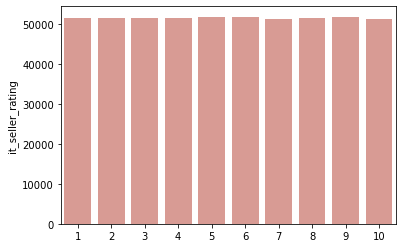

In [22]:
sns.barplot(data=RMSE1, x=RMSE1.index+1, y=RMSE1["it_seller_rating"], color = "salmon", saturation=0.5);

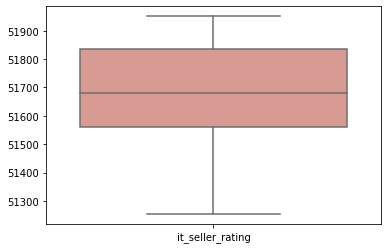

In [23]:
sns.boxplot(data=RMSE1[["it_seller_rating"]], color = "salmon", saturation=0.5);

Wykresy prezentujące RMSE dla zmiennej "it_quantity"

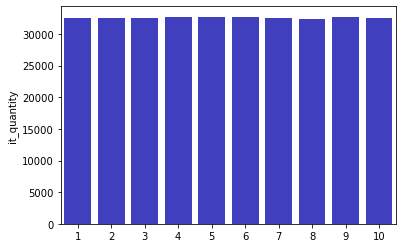

In [24]:
sns.barplot(data=RMSE1, x=RMSE1.index+1, y=RMSE1["it_quantity"], color = "blue", saturation=0.5);

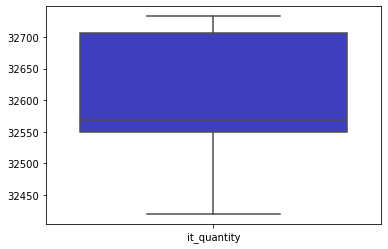

In [25]:
sns.boxplot(data=RMSE1[["it_quantity"]], color = "blue", saturation=0.5);

Jak widać, RMSE pomiędzy obserwacjami rózni się znikomo, odchylenia standardowe są pomijalne biorąc pod uwagę średnią wielkości RMSE.\
Jeśli chodzi o samą wielkość RMSE wydaje się ona dość istotna patrząc na to, że mediana *it_quantity* to 95, średnia 6748, a mediana *it_seller_rating* to 6711, średnia 20402. Wynika to prawdopodbnie z dużej róźnorodności danych i ich nieuporządkowania.
